In [ ]:
import pandas as pd
df = pd.read_csv('/content/chennai_rainfall_2019_2023_mm.csv')
df

,Date,Year,Month,Temperature (°C),Humidity (%),Wind Speed (km/h),Rainfall (cm),Rainfall (mm)
0,2019-01-01,2019,1,31.0,74.5,13.3,0.5,5.0
1,2019-01-02,2019,1,29.7,87.1,9.5,0.1,1.0
2,2019-01-03,2019,1,31.3,79.5,12.4,0.3,3.0
3,2019-01-04,2019,1,33.0,80.1,13.1,0.1,1.0
4,2019-01-05,2019,1,29.5,83.5,12.0,1.4,14.0
...,...,...,...,...,...,...,...,...
1821,2023-12-27,2023,12,30.2,81.1,10.5,0.1,1.0
1822,2023-12-28,2023,12,29.6,83.9,11.5,0.4,4.0
1823,2023-12-29,2023,12,28.7,77.8,16.9,0.1,1.0
1824,2023-12-30,2023,12,30.3,82.0,11.5,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1826 non-null   object 
 1   Year               1826 non-null   int64  
 2   Month              1826 non-null   int64  
 3   Temperature (°C)   1826 non-null   float64
 4   Humidity (%)       1826 non-null   float64
 5   Wind Speed (km/h)  1826 non-null   float64
 6   Rainfall (cm)      1826 non-null   float64
 7   Rainfall (mm)      1826 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 114.3+ KB


In [ ]:
df.columns

Index(['Date', 'Year', 'Month', 'Temperature (°C)', 'Humidity (%)',
       'Wind Speed (km/h)', 'Rainfall (cm)', 'Rainfall (mm)'],
      dtype='object')

In [ ]:
df.drop('Date', axis=1, inplace=True)

In [ ]:
import numpy as np
Q1 = np.percentile(df, 25)
Q3 = np.percentile(df, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Q1:", Q1, "Q3:", Q3, "IQR:", IQR)
print("Lower Bound:", lower_bound, "Upper Bound:", upper_bound)
print("Outliers:", outliers)

Q1: 4.9 Q3: 76.8 IQR: 71.89999999999999
Lower Bound: -102.94999999999999 Upper Bound: 184.64999999999998
Outliers: {'Year': [], 'Month': [], 'Temperature (°C)': [37.7, 23.5, 36.2, 24.6, 24.7, 24.3, 24.2, 24.3, 24.2, 36.4, 24.6], 'Humidity (%)': [95.7, 65.3, 64.9, 93.8, 95.5, 94.7, 94.9, 66.3, 99.6, 65.0, 65.8, 65.5, 94.3, 65.4], 'Wind Speed (km/h)': [21.7, 21.5, 3.9, 3.5, 20.4, 3.0, 3.4, 3.5, 3.3, 3.5, 2.5, 2.5, 20.3, 21.2, 21.3, 20.8, 20.8, 19.8, 19.7], 'Rainfall (cm)': [7.8, 7.2, 4.4, 10.8, 5.3, 4.5, 5.0, 5.3, 4.6, 4.6, 4.7, 6.1, 4.4, 4.6, 4.4, 7.9, 5.0, 6.0, 5.9, 7.4, 4.4, 8.3, 5.6, 5.1, 5.5, 10.5, 6.2, 4.9, 5.6, 9.7, 4.9, 4.4, 4.6, 4.7, 5.2, 6.2, 4.4, 5.0, 4.8, 8.0, 4.4, 5.8, 5.4, 5.3, 6.7, 5.6, 4.5, 5.3, 5.3, 4.5, 6.5, 7.7, 4.9, 6.4, 5.0, 5.0, 4.4, 4.5, 4.4, 5.7, 6.7, 9.5, 7.3, 5.0, 7.3, 5.3, 4.6, 5.1, 5.2, 4.4, 4.8, 5.0, 4.4, 8.8, 4.9, 5.4, 4.4, 6.3, 5.8, 5.4, 5.6, 7.0, 11.5, 4.8, 4.4, 4.8, 5.0, 9.3, 5.0, 7.8, 5.8, 6.9, 4.5, 8.3, 4.7, 7.9, 5.5, 7.3, 8.5, 4.4, 7.6, 5.1, 5.8, 5.1, 

In [ ]:
def detect_outliers_iqr(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        outlier_counts[col] = len(outliers)

    return outlier_counts

In [ ]:
outlier_results = detect_outliers_iqr(df)
for col, count in outlier_results.items():
    print(f"{col} [{count}]")

Year [0]
Month [0]
Temperature (°C) [11]
Humidity (%) [14]
Wind Speed (km/h) [19]
Rainfall (cm) [128]
Rainfall (mm) [128]


In [ ]:
def cap_outliers_iqr(df):
    capped_df = df.copy()
    for col in capped_df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = capped_df[col].quantile(0.25)
        Q3 = capped_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        capped_df[col] = capped_df[col].apply(
            lambda x: lower if x < lower else (upper if x > upper else x)
        )
    return capped_df
df_capped = cap_outliers_iqr(df)

print("Original DataFrame:\n", df)
print("\nCapped DataFrame:\n", df_capped)

Original DataFrame:
       Year  Month  Temperature (°C)  Humidity (%)  Wind Speed (km/h)  \
0     2019      1              31.0          74.5               13.3   
1     2019      1              29.7          87.1                9.5   
2     2019      1              31.3          79.5               12.4   
3     2019      1              33.0          80.1               13.1   
4     2019      1              29.5          83.5               12.0   
...    ...    ...               ...           ...                ...   
1821  2023     12              30.2          81.1               10.5   
1822  2023     12              29.6          83.9               11.5   
1823  2023     12              28.7          77.8               16.9   
1824  2023     12              30.3          82.0               11.5   
1825  2023     12              30.9          82.8               11.9   

      Rainfall (cm)  Rainfall (mm)  
0               0.5            5.0  
1               0.1            1.0  
2  

In [ ]:
for col, count in detect_outliers_iqr(df_capped).items():
    print(f"{col} [{count}]")

Year [0]
Month [0]
Temperature (°C) [0]
Humidity (%) [0]
Wind Speed (km/h) [0]
Rainfall (cm) [0]
Rainfall (mm) [0]


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats    # used box cox transformation

In [ ]:
X = np.random.rand(100, 2)
y = np.random.exponential(2, 100)

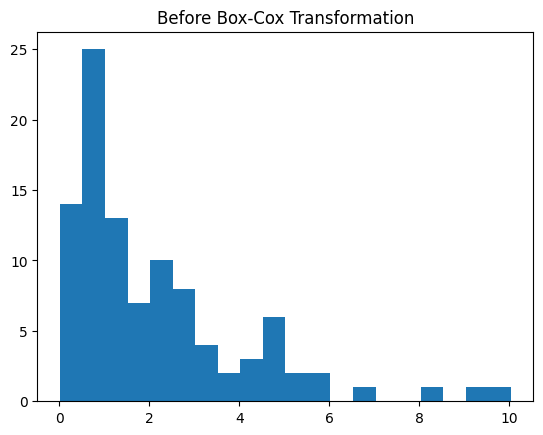

In [ ]:
plt.hist(y, bins=20)
plt.title('Before Box-Cox Transformation')
plt.show()

In [ ]:
y_transformed, lambda_ = stats.boxcox(y)
print(f"Optimal lambda for Box-Cox transformation: {lambda_}")


Optimal lambda for Box-Cox transformation: 0.230731427975416


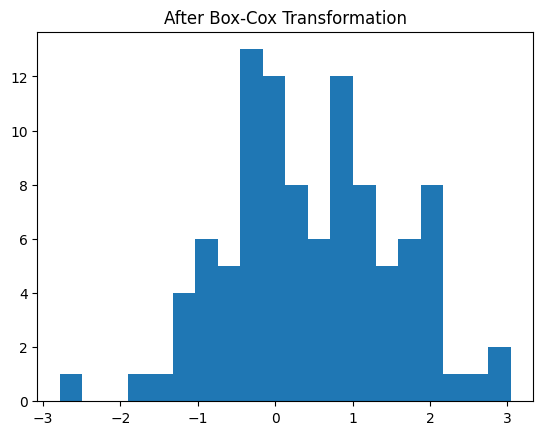

In [ ]:
plt.hist(y_transformed, bins=20)
plt.title('After Box-Cox Transformation')
plt.show()

In [ ]:
x = df.drop(['Rainfall (mm)','Rainfall (cm)'], axis=1)
y = df['Rainfall (cm)']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()                #standard scalar
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
y_train_log = np.log1p(y_train)      #log transform & gbr method
y_test_log  = np.log1p(y_test)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train_scaled, y_train_log)


GradientBoostingRegressor(random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()         # Training models on the log target through linear regression
lr.fit(X_train_scaled, y_train_log)

LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train_log)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
pred_log_lr  = lr.predict(X_test_scaled)
pred_mm_lr   = np.expm1(pred_log_lr)

pred_log_rf  = rf.predict(X_test_scaled) # Predicting on scaled test data
pred_mm_rf   = np.expm1(pred_log_rf)   # exp(pred) - 1 gives rainfall in mm

pred_log_gbr = gbr.predict(X_test_scaled)
pred_mm_gbr  = np.expm1(pred_log_gbr)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Evaluating Linear Regression:")
mae_lr  = mean_absolute_error(y_test, pred_mm_lr)
mse_lr = mean_squared_error(y_test, pred_mm_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr   = r2_score(y_test, pred_mm_lr)
print(f"Linear Regression with log target -> MAE: {mae_lr:.3f}, RMSE: {rmse_lr:.3f}, R²: {r2_lr:.3f}")

print("\nEvaluating RandomForest:")
mae_rf  = mean_absolute_error(y_test, pred_mm_rf)
mse_rf = mean_squared_error(y_test, pred_mm_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf   = r2_score(y_test, pred_mm_rf)
print(f"RandomForest with log target -> MAE: {mae_rf:.3f}, RMSE: {rmse_rf:.3f}, R²: {r2_rf:.3f}")

print("\nEvaluating Gradient Boosting Regressor:")
mae_gbr  = mean_absolute_error(y_test, pred_mm_gbr)
mse_gbr = mean_squared_error(y_test, pred_mm_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr   = r2_score(y_test, pred_mm_gbr)
print(f"Gradient Boosting Regressor with log target -> MAE: {mae_gbr:.3f}, RMSE: {rmse_gbr:.3f}, R²: {r2_gbr:.3f}")

Evaluating Linear Regression:
Linear Regression with log target -> MAE: 1.048, RMSE: 1.706, R²: 0.058

Evaluating RandomForest:
RandomForest with log target -> MAE: 0.855, RMSE: 1.434, R²: 0.334

Evaluating Gradient Boosting Regressor:
Gradient Boosting Regressor with log target -> MAE: 0.847, RMSE: 1.450, R²: 0.320
